<a href="https://colab.research.google.com/github/anas1IA/2024_new_package/blob/main/TP_multi_agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
class Agent:
    def __init__(self, agent_id, domain):
        self.agent_id = agent_id
        self.domain = domain
        self.agent_view = {}
        self.current_value = None
        self.outgoing_links = []
        self.incoming_links = []
        self.constraint_list = []

    def receive_message(self, message):
        if message[0] == "ok?":
            self.add_to_agent_view(message[1])
            self.check_agent_view()
        elif message[0] == "nogood!":
            self.handle_nogood(message[1], message[2])
        elif message[0] == "add_neighbor":
            self.add_neighbor(message[1])

    def add_to_agent_view(self, value):
        self.agent_view[value[0]] = value[1]

    def check_agent_view(self):
        if self.agent_view and self.current_value is not None and self.agent_view != self.current_value:
            consistent_values = [d for d in self.domain if self.is_consistent(d)]
            if not consistent_values:
                self.backtrack()
            else:
                selected_value = consistent_values[0]
                self.current_value = selected_value
                for link in self.outgoing_links:
                    link.send_message(("ok?", (self.agent_id, selected_value)))

    def is_consistent(self, value):
        for var, val in self.agent_view.items():
            if var == self.agent_id:  # Skip self-comparison
                continue
            if value == val:
                return False
            if (self.agent_id, '!=', var) in constraints_dict.get(self.agent_id, []):
                if val == value:
                    return False
        return True

    def backtrack(self):
        nogood = self.generate_nogood()
        if nogood:
            self.broadcast_nogood(nogood)
            self.terminate()
        else:
            inconsistent_subset = self.find_inconsistent_subset()
            if inconsistent_subset:
                x, d = inconsistent_subset[0]
                self.remove_from_agent_view(x)
                for link in self.outgoing_links:
                    link.send_message(("nogood!", (x, inconsistent_subset)))
                self.add_to_constraint_list(inconsistent_subset)
                self.check_agent_view()

    def generate_nogood(self):
        # Logic to generate a nogood
        pass

    def broadcast_nogood(self, nogood):
        # Logic to broadcast nogood to neighbors
        pass

    def terminate(self):
        # Logic to terminate and broadcast no solution
        pass

    def find_inconsistent_subset(self):
        # Logic to find inconsistent subset in agent_view
        pass

    def remove_from_agent_view(self, agent_id):
        del self.agent_view[agent_id]

    def add_to_constraint_list(self, nogood):
        self.constraint_list.append(nogood)

    def handle_nogood(self, x, nogood):
        if x not in self.incoming_links:
            self.incoming_links.append(x)
            # Ask x to add self as neighbor
            for link in self.outgoing_links:
                link.send_message(("add_neighbor", self.agent_id))

    def add_neighbor(self, agent_id):
        # Add agent_id to outgoing_links if not already present
        if agent_id not in [link.receiver.agent_id for link in self.outgoing_links]:
            self.outgoing_links.append(Link(self, agents[agent_id]))




In [22]:
class Link:
    def __init__(self, sender, receiver):
        self.sender = sender
        self.receiver = receiver

    def send_message(self, message):
        self.receiver.receive_message(message)




In [23]:
agent_view = {}  # Dictionnaire pour stocker les vues des agents
constraint_list = []  # Liste pour stocker les contraintes

# Domaines de définition
domain_dict = {
    'A': [1, 2, 3],
    'B': [1],
    'C': [2, 3],
    'D': [3]
}

# Contraintes basées sur le graphe orienté
constraints_dict = {
    'A': [('C', '!=', 'A')],
    'B': [('A', '!=', 'B'), ('C', '!=', 'B')],
    'C': [('D', '!=', 'C')],
    'D': []}

In [24]:
# Creating agents with different domains
agents = {}
for agent_id, domain in domain_dict.items():
    agents[agent_id] = Agent(agent_id, domain)

# Establishing connections between agents
for agent_id, constraints in constraints_dict.items():
    for constraint in constraints:
        neighbor_id = constraint[0]
        if neighbor_id in agents:
            agents[agent_id].outgoing_links.append(Link(agents[agent_id], agents[neighbor_id]))


# Sending initial messages to start the process
agents['A'].check_agent_view()


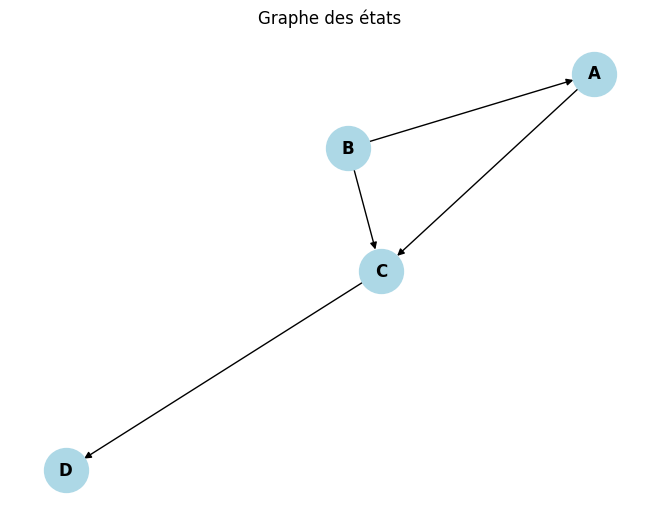

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# Définition du graphe
G = nx.DiGraph()

# Ajout des nœuds
nodes = ['A', 'B', 'C', 'D']
G.add_nodes_from(nodes)

# Ajout des arêtes
edges = [('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'D')]
G.add_edges_from(edges)

# Définition de la position des nœuds pour la visualisation
pos = nx.spring_layout(G)

# Dessin du graphe
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=12, font_weight='bold', arrows=True)

# Affichage de la visualisation
plt.title("Graphe des états")
plt.show()

In [29]:
# Initializing agent views with initial values
initial_values = {'D': 3, 'A': 3, 'C': 2, 'B': 1}
for agent_id, value in initial_values.items():
    agents[agent_id].add_to_agent_view((agent_id, value))


# Sending initial messages to start the process
agents['A'].check_agent_view()